Preliminary Steps

In [1]:
#Import Pandas and DecisionTree Classifier, 
# Regex, 
# TextBlob, 
# TextFeatures, 
# NLTK,
# and CountVectorizer
import pandas as pd
import re
from sklearn.tree import DecisionTreeClassifier
import nltk
nltk.download("wordnet")
from textblob import Word
import textfeatures as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import tree
import pickle
import joblib

[nltk_data] Downloading package wordnet to /home/monty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/monty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Import data as Dataframes, then parse into full dataset with new feature called "ground_truth"
real, fake = pd.read_csv("Data/True.csv"), pd.read_csv("Data/Fake.csv")
real['isRealClassification'] = True
fake['isRealClassification'] = False
dataset = pd.concat([real, fake])

In [3]:
dataset

,title,text,subject,date,isRealClassification
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",False
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",False
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",False
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",False


In [4]:
#Allow user to enter their own article
f = open("article.txt", "r")
count = 0
input_text = ""
subject = "" #Leave blank
for line in f:
    if(count==0):
      input_title = line
    elif(count==1):
        input_date = line
    else:
        input_text += line
    count+=1
user_row = [input_title, input_text, subject, input_date, False]

In [5]:
dataset

,title,text,subject,date,isRealClassification
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",False
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",False
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",False
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",False


Data Collection and Cleaning

In [6]:
#Extracting amount of capitalized/lowercase words in the title
dataset["titleUpperCaseCount"] = dataset['title'].str.findall(r'[A-Z]').str.len()
dataset["titleLowerCaseCount"] = dataset['title'].str.findall(r'[a-z]').str.len()
#Extracting amount of capitalized/lowercase words in the text
dataset["textUpperCaseCount"] = dataset['text'].str.findall(r'[A-Z]').str.len()
dataset["textLowerCaseCount"] = dataset['text'].str.findall(r'[a-z]').str.len()

In [7]:
#Only including rows with proper date format
# filter = dataset['date'].str.contains(r'[A-Z][a-z]{4,100}')
# dataset =  dataset[~filter]

In [8]:
#Extract the month  from the texts, then drop 'date'
dataset["Month"]= dataset["date"].str.split(" ").str[0]
dataset = dataset.drop(["date"], axis=1)

In [9]:
#Encode Subject Label & month
label_encoder = preprocessing.LabelEncoder()
dataset["Month"] = label_encoder.fit_transform(dataset['Month'])

In [10]:
#Extract feature counts from words
tf.word_count(dataset,"text", "word_count")
tf.stopwords_count(dataset, "text", "stopword_count")

,title,text,subject,isRealClassification,titleUpperCaseCount,titleLowerCaseCount,textUpperCaseCount,textLowerCaseCount,Month,word_count,stopword_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,True,4,48,155,3567,11,753,268
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,True,4,49,119,3217,11,625,218
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,True,7,38,117,2134,11,466,175
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,True,8,41,110,1902,11,377,136
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,True,4,53,200,3925,11,864,317
...,...,...,...,...,...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,False,13,38,152,2481,15,542,203
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,False,15,46,69,1261,15,301,125
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,False,12,57,962,19130,15,4343,1712
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,False,9,42,170,1921,15,476,169


In [11]:
#Get words counts(in groups of 1 to 3)
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=1000, dtype=float)
counts_sparse = vectorizer.fit_transform(dataset['text'])
counts = pd.DataFrame(counts_sparse.toarray(), index=dataset.index, columns=vectorizer.get_feature_names_out())


In [ ]:
#Remove text & titles & subject columns for classification
dataset = dataset.drop(["title","text", "subject", "titleUpperCaseCount"],axis=1)

In [ ]:
#Concat dataframes
dataset = pd.concat([dataset, counts], axis=1)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4719
        True       1.00      1.00      1.00      4261

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



['model.pkl']

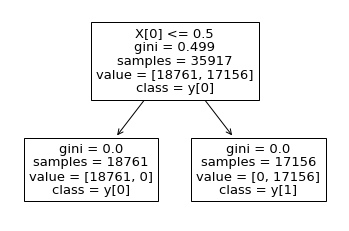

In [ ]:
#Split data
user_article = dataset.iloc[-1:]
dataset.drop(dataset.tail(1).index,inplace=True)
X = dataset[dataset.columns[dataset.columns!='real']]
y = dataset["isRealClassification"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Plot the training
tree.plot_tree(clf, class_names=True)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
joblib.dump(clf, "model.pkl")

In [ ]:
user_article = user_article.drop("isRealClassification", axis=1)

In [ ]:
user_article

,titleUpperCaseCount,titleLowerCaseCount,textUpperCaseCount,textLowerCaseCount,Month,word_count,stopword_count,000,10,100,...,year,year old,years,yet,york,you,you can,you re,young,your
23480,11,51,281,3892,15,905,331,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Show performance of a DummyClassifier("most_frequent")
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

       False       0.53      1.00      0.69      4719
        True       0.00      0.00      0.00      4261

    accuracy                           0.53      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.28      0.53      0.36      8980



/home/monty/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/monty/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/monty/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(clf.predict(user_article))

[ True]


/home/monty/.local/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- real
Feature names seen at fit time, yet now missing:
- isRealClassification

  warnings.warn(message, FutureWarning)
